# Hello Word en Machine Learning

¡Hello People! La idea de este proyecto es poder construir un modelo por medio de un algoritmo para realizar predicciones. Para ello usaremos el set de datos de [IRIS](https://en.wikipedia.org/wiki/Iris_flower_data_set) 

## Informacion del set de IRIS

Este set de datos es muy conocido, tanto que se lo conoce como el "Hello world" para Machine Learning. Consiste en 150 registros de cada tipo de flor IRIS en la cual tenemos informacion del ancho y longitud de los petalos y sepalos.

## ¿Como empezamos?

Empecemos con lo que suele dar pie a todo trabajo: con una pregunta, ¿Que queremos resolver?

En este ejemplo propongo que nuestro problema sea predicir a que tipo de especie de IRIS pertenece una nueva flor

Con esto podemos decir que estamos ante un problema de clasificacion ¿Porque? Queremos predecir a que tipo de especie de IRIS es nuestra nueva flor, es decir, clasificar el resultado.

Para esto utilizaremos Python 3 y la libreria Pandas. Para empezar hagamos un import de la librerias que vamos a usar


In [26]:
import pandas as pd # Para el procesamiento de datos de CSV 

Una vez importado las librerias podemos leer el CSV para formar un data frame.

#### ¿Que es un data frame?

Un data frame puede pensar como una tabla en la cual se tienen un conjunto de filas y columnas con datos. Lo potente de esto es que podemos realizar operaciones en el mismo, como agregar nuevas columnas, modificar valores, etc...

Vamos a leer el set de datos:


In [27]:
df_iris = pd.read_csv("data/Iris.csv")

Y visualizamos los datos que tenemos un nuestro data frame con la funcion head()

In [28]:
df_iris.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Con esto podemos visualizar la informacion que tenemos. Tenemos las longitudes, anchos en centimetros y como ultima columna tenemos la especie a la que pertenece

Algo que podemos ver a simple lista que no nos es relevante es la columna ID, por lo que podemos dropearla de nuestro data frame

In [29]:
df_iris.drop(['Id'], axis=1, inplace=True)
df_iris.head()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

### Analicemos los datos

Ahora realizaremos un breve analisis de la informacion del set de datos. Esto nos ayudara a entender el set de datos y detectar patrones para empezar a construir el modelo.

Analicemos con lo basico, que tipos posibles de especies tenemos



In [30]:
df_iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Con esto podemos ver que solo tenemos 3 tipos de IRIS. Uno de estos valores va a ser la salida de nuestro modelo. 
Estos valores se suelen conocer como "labels" los cuales son las clases a las que quiero que el algormitmo clasifique.

Analicemos la informacion que tenemos

En el siguiente grafico de barra podemos observar que para cada especie tenemos 50 registros, lo que me indica que no tengo ninguna variable sin casos, lo que es lo ideal. Por ejemplo: podia darse el caso de que nuestro set tenga puros datos de un tipo especifico por lo que tendriamos que tener cuidado ya que el modelo se construiria tomando como casos de un solo tipico, lo que provocaria que en caso de llegar otro tipo no sepa como interpretarlo. Es importante tratar de tener la misma cantidad de casos

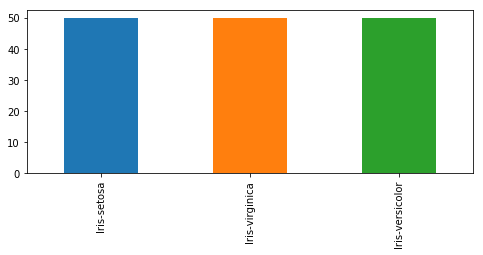

In [31]:
pd.value_counts(df_iris['Species']).plot.bar( figsize = (8,3));

Un histograma nos puede ayudar a observar que tanto tenemos distribuidos los posibles valores de longitudes de los petalos. Todo esto nos permite detectar si tenemos algo anormal en el set de datos

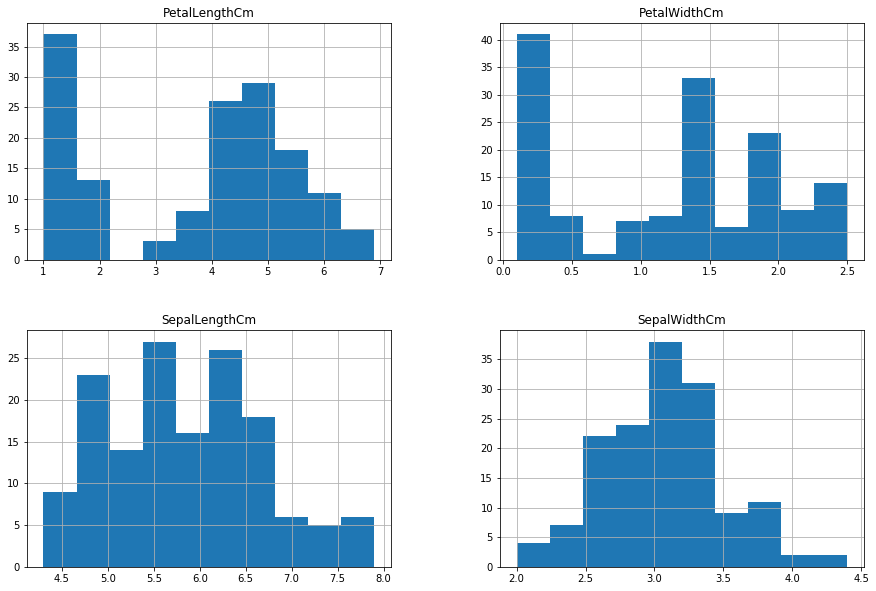

In [32]:
df_iris.hist(figsize = (15,10));

Podemos ver si podemos encontrar alguna agrupacion por el tamaño de los sepalos con un grafico ScatterPlot. Como podemos ver en el grafico no vemos ningun tipo de relacion posible entre las longitudes de los sepalos

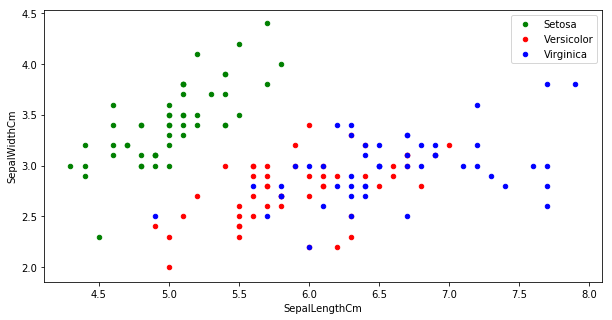

In [34]:
df_setosa = df_iris[df_iris.Species=="Iris-setosa"]
df_versicolor = df_iris[df_iris.Species=="Iris-versicolor"]
df_virginica = df_iris[df_iris.Species=="Iris-virginica"]
ax = df_setosa.plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color = 'Green',label ='Setosa')
ax2 = df_versicolor.plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color = 'Red',label ='Versicolor', ax=ax);
df_virginica.plot.scatter(x='SepalLengthCm',y='SepalWidthCm',color = 'Blue',label ='Virginica', ax=ax2, figsize=(10,5));


Sin embargo podemos ver que hay un patron detectado en la longitud de los petalos! Los petalos de las Setosa tienen una menor cantidad de longitud en centimetros. Esto nos puede ayudar al momento de predecir, si los petalos de una flor tiene una longitud entre 0,5 cm de ancho y 2 cm de largo es muy probable que sea de la especie Setosa!

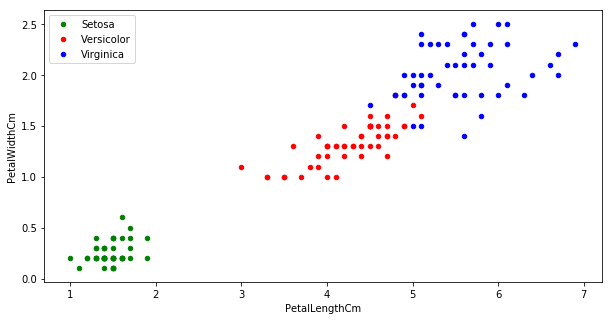

In [35]:
df_setosa = df_iris[df_iris.Species=="Iris-setosa"]
df_versicolor = df_iris[df_iris.Species=="Iris-versicolor"]
df_virginica = df_iris[df_iris.Species=="Iris-virginica"]
ax = df_setosa.plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color = 'Green',label ='Setosa')
ax2 = df_versicolor.plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color = 'Red',label ='Versicolor', ax=ax);
df_virginica.plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color = 'Blue',label ='Virginica', ax=ax2, figsize=(10,5));



### ¡Hora de implementar el algoritmo!

Podemos seguir mucho mas tiempo analizando los datos, pero vamos al core. La construccion del modelo.

Pero antes repasamos un poco que tenemos que tener para la construccion del mismo. Veamos la siguiente imagen.


![Diagrama](img/sl.png)

En esta imagen esta reflejado todo lo que vamos a realizar: 

- Con el set de datos vamos a identificar los **Features** y los **Labels** de nuestro problema 
- Con esa informacion vamos a entrenar un modelo. 
- Teniendo ahora informacion nueva vamos a usar nuestro modelo para realizar las predicciones

Seguramente se estaran preguntando ¿Que es un Feature? y ¿Que es un Label?

Un **Feature** es una propiedad del problema la cual queremos usar para predecir resultados. El analisis de datos nos ayuda a descubrir cuales son los features mas importantes. Justamente por esta razon, es porque se dedica tanto tiempo en el mismo. Un ejemplo son las longitudes de petalos y sepalos para este problema. 

Los **Labels** son los resultados que esperamos de nuestro problemas. En el caso nuestro son los tipos de especies posibles

Pasemos a la construccion del modelo. Para ello usaremos la libreria **Sklearn** la cual es muy conocida para Machine Learning por su facilidad de uso y la inclusion de diferentes algoritmos.

En nuestro caso eligiremos el algoritmo KNN


In [36]:
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn.metrics import accuracy_score

Muy bien! Tenemos importado nuestro algoritmo. ¿Y ahora? ¿Como continuamos?

Un detalle no menor a tener en cuenta es que vamos a construir el modelo, pero ¿Como vamos a probar su eficacia? 

Lo que podemos hacer es segmentar el set de datos de entrenamiento y usarlo para validar la eficacia del modelo. Por ejemplo, uso el 80% de datos para entrenar el modelo y otro 20% para validar la eficacia


In [37]:
# Divide en 80% y 20% el set de datos 
set_entrenamiento, set_validacion = train_test_split(df_iris, test_size = 0.2, random_state=4) 
print(set_entrenamiento.shape)
print(set_validacion.shape)

(120, 5)
(30, 5)


Muy bien! Tenemos ahora el set de datos para entrenar y el set de datos para validar. Ahora nos queda el trabajo de elegir nuestros features, para ello usaremos el analisis previo hecho. 

Vimos que tenemos los datos mas separados en grupos en el caso de la longitud de petalos. Por lo que usarlos es una buena idea. 
Usaremos en un caso aparte tambien la longitud de los sepalos para observar los resultados.

Veamos primero el caso de usar sepalos

Consideramos a nuestro set de datos con solo los features elegidos como si fuera una variable X y el set de datos con solo los labels como si fuera una variable Y

In [38]:
#Creo un data frame con solo los features que elegi para entrenar
set_entrenamiento_caso_sepalos_x = set_entrenamiento[['SepalLengthCm','SepalWidthCm']] 
#Creo un data frame con solo los resultados
set_entrenamiento_caso_sepalos_y=set_entrenamiento.Species

#Hacemos los mismo para el data frame de validacion
set_validacion_caso_sepalos_x= set_entrenamiento[['SepalLengthCm','SepalWidthCm',]] # taking test data features
set_validacion_caso_sepalos_y =set_entrenamiento.Species   #output value of test data

Entonces, esta es la informacion con la que voy a entrenar el algoritmo

In [39]:
print("Set de entrenamiento con features")
display(set_entrenamiento_caso_sepalos_x.head())
print("Set de entrenamiento con labels")
display(set_entrenamiento_caso_sepalos_y.head())

Set de entrenamiento con features


SepalLengthCm  SepalWidthCm
84             5.4           3.0
47             4.6           3.2
108            6.7           2.5
1              4.9           3.0
93             5.0           2.3

Set de entrenamiento con labels


84     Iris-versicolor
47         Iris-setosa
108     Iris-virginica
1          Iris-setosa
93     Iris-versicolor
Name: Species, dtype: object

Y este es el set que vamos a usar para validar

In [40]:
print("Set de validacion con features")
display(set_validacion_caso_sepalos_x.head())
print("Set de validacion con labels")
display(set_validacion_caso_sepalos_y.head())

Set de validacion con features


SepalLengthCm  SepalWidthCm
84             5.4           3.0
47             4.6           3.2
108            6.7           2.5
1              4.9           3.0
93             5.0           2.3

Set de validacion con labels


84     Iris-versicolor
47         Iris-setosa
108     Iris-virginica
1          Iris-setosa
93     Iris-versicolor
Name: Species, dtype: object

Ahora vamos a entrenar con el algoritmo KNN. Como informacion basica KNN tiene un parametro N que es variable

In [41]:
modelo = KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
modelo = modelo.fit(set_entrenamiento_caso_sepalos_x,set_entrenamiento_caso_sepalos_y);

Listo!! Con eso ya tenemos el modelo armado! Sencillo no? Ahora hagamos las predicciones. Para ello el modelo tiene una function predict la cual recibe como parametro los features que queremos predecir su clase (En nuestro caso los vamos a validar despues) y como salida tendremos un array con las clases a las cual el algoritmo predijo. Este array lo agregaremos como nueva columna al set de validacion y con ello tendremos los resultados en base a los features

In [42]:
prediction=modelo.predict(set_validacion_caso_sepalos_x)

df_resultado_final = set_validacion_caso_sepalos_x.copy()
df_resultado_final['tipo_especie'] = prediction
df_resultado_final.head()

SepalLengthCm  SepalWidthCm     tipo_especie
84             5.4           3.0  Iris-versicolor
47             4.6           3.2      Iris-setosa
108            6.7           2.5   Iris-virginica
1              4.9           3.0      Iris-setosa
93             5.0           2.3  Iris-versicolor

¡Excelente! Ahora podemos calcular la precision de nuestro modelo validandolo con los resultados que conocemos. Para ello sklearn tiene una paquete de metrics el cual nos devuelve el porcentaje de eficiencia en base a los resultados predecidos y los que conocemos 

In [46]:
from sklearn.metrics import accuracy_score
print('La eficacia del algoritmo fue',accuracy_score(prediction,set_validacion_caso_sepalos_y))

La eficacia del algoritmo fue 0.8166666666666667


¡Tenemos un resultado de 81%! Pero ahora viene lo bueno! Si usamos lo aprendido del analisis de datos sabemos que para cada tipo de especie la longitud de los petalos importan mucho. Esto lo vimos en el grafico scatter plot donde se pudian formar pequeños conjuntos para tipo de especie en el grafico. Usando los petalos como features veamos que diferencia tenemos

In [44]:
#Similar al caso anterior. Me armo los set de entrenamiento y validacion con petalos como features
set_entrenamiento_caso_petalos_x = set_entrenamiento[['PetalLengthCm','PetalWidthCm']] 
set_entrenamiento_caso_petalos_y=set_entrenamiento.Species

set_validacion_caso_petalos_x= set_entrenamiento[['PetalLengthCm','PetalWidthCm',]] 
set_validacion_caso_petalos_y =set_entrenamiento.Species

#Armamos de nuevo el modelo
modelo_petalos=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
modelo_petalos.fit(set_entrenamiento_caso_petalos_x,set_entrenamiento_caso_petalos_y)
prediciones_modelo_petalos=modelo_petalos.predict(set_validacion_caso_petalos_x)


Contruimos el modelo y realizamos las predicciones. Ahora calculemos la eficacia

In [45]:
print('La eficacia del algoritmo fue',accuracy_score(prediciones_modelo_petalos,set_validacion_caso_petalos_y))

La eficacia del algoritmo fue 0.9666666666666667


Ufff ¡Un **96%**! Con esto podemos ver a simple vista la importancia de elegir los features correctos para la construccion del modelo. ¡Y esto en un set de datos sencillos! 

## Conclusiones Finales

Este notebook represento cada uno de los pasos necesarios para resolver un problema aplicando algoritmos de Machine Learning.

Lo primero que hicimos fue obtener los datos y hacernos la pregunta que problema quiero resolver. Esto es muy importante porque todo lo que hagamos sera en funcion de resolver este problema

Lo segundo es la importancia del analisis de datos. Con ello podemos observar que nuestro set de datos no tiene nada que sea anormal a simple vista y detectamos un patron en comun en la longitud de los petalos que luego pudimos aplicar en la implementacion

Por ultimo la importancia de la eleccion de features para la construccion del modelo. Vimos que usando un feature de sepalos obtuvimos un 81% pero usando el feature de petalos el cual con el analisis sabemos que existen una relacion con el tipo de especie pudimos mejorar la eficacia en un 97%

Para terminar me gustaria mencionar que existen muchos mas conceptos que quedaron fuera de este notebook y que son importantes en Machine Learning. Mas adelante podremos hablar de ellos, pero espero que halla servido este ejemplo de hello world.

Como siguiente: La idea es exportar este modelo entrenado, levantar una aplicacion en java, consumir el modelo y poder consultar por medio de un servicio REST. 

¡Gracias!